<a href="https://colab.research.google.com/github/manishaprasad23/Training_digital/blob/master/rAssignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#We upload all the packages we need
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import math
import os
import scipy.misc
from scipy.stats import itemfreq
from random import sample
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Image manipulation.
import PIL.Image
from IPython.display import display
#from resizeimage import resizeimage

#Panda
import pandas as pd

#Open a Zip File
from zipfile import ZipFile
from io import BytesIO

In [3]:
# arch_train = ZipFile("train.zip", 'r')
arch_test = ZipFile("test.zip", 'r')

arch_train.namelist()[0:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
len_train = len(arch_train.namelist()[:])-1
nwidth = 60
nheight = 60
ndepth = 3
img_train = np.zeros((len_train, nwidth, nheight, ndepth))

In [0]:
for i in range(1,len(arch_train.namelist()[:])):
    if not (arch_train.namelist()[i].startswith('__MACOSX/')):
        # print(arch_train.namelist()[i])
        filename = BytesIO(arch_train.read(arch_train.namelist()[i]))
        # print(filename)
        image = PIL.Image.open(filename) # open colour image
        image = image.resize((nwidth, nheight))
        image = np.array(image)
        image = np.clip(image/255.0, 0.0, 1.0) #255 = max of the value of a pixel

        img_train[i-1]=image

In [0]:
pickle.dump(img_train, open('arch_train' + '.p', "wb" ) )

In [0]:
len_test = len(arch_test.namelist()[:])-1
nwidth = 60
nheight = 60
ndepth = 3
img_test = np.zeros((len_test, nwidth, nheight, ndepth))

In [0]:
for i in range(1,len(arch_test.namelist()[:])):
    if not (arch_test.namelist()[i].startswith('__MACOSX/')):
        # print(arch_test.namelist()[i])
        filename = BytesIO(arch_test.read(arch_test.namelist()[i]))
        # print(filename)
        image = PIL.Image.open(filename) # open colour image
        image = image.resize((nwidth, nheight))
        image = np.array(image)
        image = np.clip(image/255.0, 0.0, 1.0) #255 = max of the value of a pixel

        img_test[i-1]=image

In [0]:
pickle.dump(img_test, open('arch_test' + '.p', "wb" ) )


Load data

In [0]:
train = pickle.load( open( "arch_train.p", "rb" ) )
test = pickle.load( open( "arch_test.p", "rb" ) )

In [11]:
labels_1 = pd.read_csv("labels.csv", header=0, sep=',', quotechar='"')
labels_1.sample(5)


,id,breed
2122,34e117ba59c3244382726f68196b0ecb,norwich_terrier
852,14c8f5fc68ca8fb6b33a0082849b15ad,miniature_schnauzer
4371,6d0eae6ef2b3b419bea61e11698a6238,kerry_blue_terrier
8426,d3a8cdfa1c884e4a2557ca711bcfcfe2,flat-coated_retriever
1953,302787e28465a9b52f421de708046251,kerry_blue_terrier


In [12]:
nbreeds = 5

labels_frq= itemfreq(labels_1["breed"])
labels_frq = labels_frq[labels_frq[:, 1].argsort()[::-1]] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
main_labels = labels_frq[:,0][0:nbreeds]

In [14]:
labels_1_np = labels_1["breed"].as_matrix()
labels_1_np = labels_1_np.reshape(labels_1_np.shape[0],1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
labels_filter_i= np.where(labels_1_np == main_labels)

In [0]:
labels_filtered = labels_1.iloc[labels_filter_i[0],:]

In [0]:
train_filtered = train[labels_filter_i[0],:,:,:]

In [18]:
train_filtered.shape

(588, 60, 60, 3)

Preprocessing labels

In [19]:
label = labels_filtered["breed"].as_matrix()
label = label.reshape(label.shape[0],1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [20]:
label.shape

(588, 1)

In [0]:
labels_np = np.array([])
label_names, label_counts = np.unique(label, return_inverse=True)

In [22]:
for _, i in enumerate(itemfreq(label_counts)[:,0].astype(int)):
  labels_np0 = np.where(label_counts == itemfreq(label_counts)[:,0][i], 1., 0.)
  labels_np0 = labels_np0.reshape(1,labels_np0.shape[0])

  if (labels_np.shape[0] == 0):
            labels_np = labels_np0
  else:
            labels_np = np.concatenate((labels_np,labels_np0 ),axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


In [0]:

labels_np = labels_np.transpose()

In [24]:
labels_np.shape

(588, 5)

Check labels

In [25]:
label_cls = np.argmax(labels_np, axis = 1)
label_names[label_cls[2]]

'scottish_deerhound'

Test Train data split

In [0]:
num_validation = 0.30
X_train, X_validation, y_train, y_validation = train_test_split(train_filtered, labels_np, test_size=num_validation, random_state=6)

In [27]:
X_train.shape

(411, 60, 60, 3)

In [0]:
img_size = 60
ndepth = 3
img_flat = img_size*img_size
_shape = (img_size, img_size, ndepth)
nclasses = nbreeds

In [0]:
def new_wts(shape):
  return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [0]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [0]:

def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True,
                   use_dropout=True):  # Use 2x2 max-pooling.

    
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_wts(shape=shape)

    biases = new_biases(length=num_filters)


    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    
    layer += biases

    if use_pooling:
        
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    
    layer = tf.nn.relu(layer)
    
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob_conv)

    return layer, weights

In [0]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features


In [0]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True,
                 use_dropout=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_wts(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)
    
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob_fc)
        
    return layer


In [0]:
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, ndepth], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, ndepth]) #-1 put everything as 1 array
y_true = tf.placeholder(tf.float32, shape=[None, nclasses], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)
keep_prob_fc=tf.placeholder(tf.float32)
keep_prob_conv=tf.placeholder(tf.float32)

layer design

In [0]:
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 32         # There are 32 of these filters.

# Convolutional Layer 2.
filter_size2 = 4          # Convolution filters are 4 x 4 pixels.
num_filters2 = 64      # There are 64 of these filters.

# Convolutional Layer 3.
filter_size3 = 3          # Convolution filters are 3 x 3 pixels.
num_filters3 = 128      # There are 128 of these filters.

# Fully-connected layer.
fc_size = 500 

In [47]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=ndepth,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True,
                   use_dropout=False)
    
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True,
                   use_dropout=False)
    
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True,
                   use_dropout=True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
layer_flat, num_features = flatten_layer(layer_conv3)

In [49]:
#Train
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True,
                         use_dropout=True)

layer_fc1

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=nclasses,
                         use_relu=False,
                         use_dropout=False)

layer_fc2

<tf.Tensor 'add_4:0' shape=(?, 5) dtype=float32>

In [0]:
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [51]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
session = tf.Session()

def init_variables():
    session.run(tf.global_variables_initializer())

In [0]:
batch_size = 50

#function next_batch
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
def optimize(num_iterations, X):
    global total_iterations
    
    start_time = time.time()
    
    #array to plot
    losses = {'train':[], 'validation':[]}
    
    for i in range(num_iterations):
            total_iterations += 1
            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = next_batch(batch_size, X_train, y_train)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch,
                               keep_prob_conv : 0.3,
                               keep_prob_fc : 0.4}
            feed_dict_validation = {x: X_validation,
                               y_true: y_validation,
                               keep_prob_conv : 1,
                               keep_prob_fc : 1}
            
            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            session.run(optimizer, feed_dict=feed_dict_train)
            
            acc_train = session.run(accuracy, feed_dict=feed_dict_train)
            acc_validation = session.run(accuracy, feed_dict=feed_dict_validation)
            losses['train'].append(acc_train)
            losses['validation'].append(acc_validation)
            
            # Print status every X iterations.
            if (total_iterations % X == 0) or (i ==(num_iterations -1)):
            # Calculate the accuracy on the training-set.
                                
                msg = "Iteration: {0:>6}, Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}"
                print(msg.format(total_iterations, acc_train, acc_validation))
                
    
    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    
    plt.plot(losses['train'], label='Training loss')
    plt.plot(losses['validation'], label='Validation loss')
    plt.legend()
    _ = plt.ylim()

In [0]:
init_variables()
total_iterations = 0

Iteration:    100, Training Accuracy:  24.0%, Validation Accuracy:  19.8%
Iteration:    200, Training Accuracy:  30.0%, Validation Accuracy:  22.0%
Iteration:    300, Training Accuracy:  26.0%, Validation Accuracy:  18.6%
Iteration:    400, Training Accuracy:  24.0%, Validation Accuracy:  20.9%
Iteration:    500, Training Accuracy:  34.0%, Validation Accuracy:  20.9%
Iteration:    600, Training Accuracy:  52.0%, Validation Accuracy:  22.0%
Iteration:    700, Training Accuracy:  42.0%, Validation Accuracy:  22.6%
Iteration:    800, Training Accuracy:  58.0%, Validation Accuracy:  19.8%
Iteration:    900, Training Accuracy:  62.0%, Validation Accuracy:  18.1%
Iteration:   1000, Training Accuracy:  66.0%, Validation Accuracy:  20.9%
Iteration:   1100, Training Accuracy:  78.0%, Validation Accuracy:  18.1%
Iteration:   1200, Training Accuracy:  78.0%, Validation Accuracy:  18.6%
Iteration:   1300, Training Accuracy:  80.0%, Validation Accuracy:  19.2%
Iteration:   1400, Training Accuracy: 

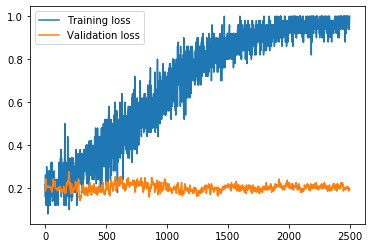

In [56]:
optimize(num_iterations=2500, X=100)

In [0]:
from google.colab import drive
drive.mount('/content/drive')